In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/place.txt")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
df.shape

(200, 2)

In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [7]:
X = pd.DataFrame(df.iloc[:,0])
Y = pd.DataFrame(df.iloc[:,1])

In [8]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [10]:
 X_train,X_test,Y_train,Y_test =train_test_split(X , Y , train_size=0.8, random_state=2)

In [11]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [12]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [13]:
Y_train

,package
137,3.13
163,3.91
111,2.25
123,2.30
109,4.06
...,...
43,2.76
22,2.30
72,3.62
15,3.23


In [14]:
Y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred

array([[3.89111601],
       [3.09324469],
       [2.38464568],
       [2.57434935],
       [1.6537286 ],
       [1.77647803],
       [2.07219258],
       [2.93143862],
       [3.76278706],
       [2.93701814],
       [4.09197872],
       [3.51170867],
       [2.97049525],
       [2.40138424],
       [3.18809652],
       [3.46707251],
       [1.94386362],
       [3.24389172],
       [2.97607477],
       [3.41685683],
       [2.55761079],
       [3.16577844],
       [2.85890486],
       [3.12114229],
       [3.68467378],
       [2.8700639 ],
       [3.49497011],
       [3.34432308],
       [3.91901361],
       [1.96060218],
       [3.65119666],
       [3.2104146 ],
       [3.74046898],
       [2.7863711 ],
       [2.78079158],
       [3.27178932],
       [3.52844723],
       [2.61340599],
       [2.65804215],
       [2.71383735]])

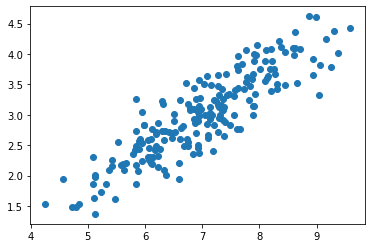

In [19]:
plt.scatter(df['cgpa'],df['package'])


#  Model Accuracy Evaluation

In [20]:
lr.score(X_train,Y_train)

0.7733110961245032

In [21]:
lr.score(X_test,Y_test)

0.780730147510384

### MEAN ABSOLUTE ERROR

In [22]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(Y_test, y_pred)

0.2884710931878175

### MEAN SQUARED ERROR

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(Y_test, y_pred)

0.12129235313495527

### ROOT MEAN SQUARED ERROR

In [34]:
import math
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(Y_test, y_pred)
rmse = math.sqrt(mse)
rmse

0.34827051717731616

### R-2

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(Y_test, y_pred)

0.780730147510384